# Avalilability Datasets

In [12]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import os
import practicum_utils as utils

In [13]:
files = utils.get_loggi_files()
files

['../data/supply/availability_dist1_ano.csv',
 '../data/supply/availability_dist2_ano.csv',
 '../data/supply/itinerary_dist1_ano.csv',
 '../data/supply/itinerary_dist2_ano.csv']

# Availability Drivers Dataset 1
Es enorme por lo que voy a levantar el 0.1% de la misma (random selection)

In [14]:
# Availability 1
df = utils.read_csv_percent(files[0], percent=0.1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6503 entries, 0 to 6502
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6503 non-null   int64  
 1   id              6503 non-null   object 
 2   driver_id       6503 non-null   object 
 3   itinerary_id    401 non-null    object 
 4   lat             6503 non-null   float64
 5   lng             6503 non-null   float64
 6   sent            6503 non-null   object 
 7   transport_type  6503 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 406.6+ KB
None


,Unnamed: 0,id,driver_id,itinerary_id,lat,lng,sent,transport_type
0,252,ad590aea1e6d6e9dcf18afa4643148b6,f1b10d55008569bea228d59af4229365,NaN,-23.494307,-46.552168,19-10-22 13:50,1
1,841,e7abb03f2bd099c23b4e6fcd094b240b,6c15c26adaa2040c4f4b9f51ece1de2a,NaN,-23.498602,-46.559393,19-10-22 15:10,1
2,1737,ff8015a60a369271eeda4388cfcca30e,ffdb5ceab0617e621e87d6169c0c3806,NaN,-23.465376,-46.525107,19-10-22 18:10,1
3,2179,8eb8ffaad3749f681dee3ffc7d94f9fe,38d2832ae8e4d19297a31c56ceead140,NaN,-23.441100,-46.529981,19-10-22 19:10,1
4,2274,b008075f06e3a7173f34c706e4afc947,28e25688ef18bcb61717b779644c30a8,NaN,-23.429320,-46.504974,19-10-22 16:55,1


In [15]:
df.nunique()

Unnamed: 0        6503
id                6503
driver_id         1487
itinerary_id       393
lat               6503
lng               6503
sent              6278
transport_type       3
dtype: int64

In [4]:
for col in ['id', 'driver_id', 'itinerary_id']:
    lid = 'len_{}'.format(col) 
    df[lid] = df[col].apply(lambda x: len(x) if pd.notna(x) else 0)
    print('Column', col)
    print('Rows with len(id) == 32:', len(df[df[lid] == 32]))
    print('Rows with len(id) == 0:', len(df[df[lid] == 0]))
    print('Rows with len(id) != 32 & != 0:', len(df[~df[lid].isin([0, 32])]))
    print()
    del df[lid]

Column id
Rows with len(id) == 32: 6406
Rows with len(id) == 0: 0
Rows with len(id) != 32 & != 0: 0

Column driver_id
Rows with len(id) == 32: 6406
Rows with len(id) == 0: 0
Rows with len(id) != 32 & != 0: 0

Column itinerary_id
Rows with len(id) == 32: 461
Rows with len(id) == 0: 5945
Rows with len(id) != 32 & != 0: 0



In [5]:
dup_itineraries = df.groupby('itinerary_id').id.count().sort_values(ascending=False)
dup_itineraries = [k for k, v in dup_itineraries.items() if v > 1]
print('Duplicates itineraries_id: {}\n'.format(len(dup_itineraries)))
show = ['driver_id', 'lat', 'lng', 'sent', 'transport_type']
#show = ['transport_type']
for i, g in df[df.itinerary_id.isin(dup_itineraries)].groupby('itinerary_id'):
    print(i)
    print(g[show])

Duplicates itineraries_id: 7

4b9c647fc6d57cba92ad8684554909da
                             driver_id        lat        lng            sent  \
2532  be79ef35ece98897b70d6a005152e45b -23.461983 -46.538080  20-02-18 06:35   
2534  be79ef35ece98897b70d6a005152e45b -23.462844 -46.550487  20-02-18 07:10   

      transport_type  
2532               1  
2534               1  
597596078a0a2eaa4fea85d02d29194f
                             driver_id        lat        lng            sent  \
1272  7147d153f608f0fe4630e267a5ccba1c -23.483423 -46.566129  19-12-27 20:45   
1277  7147d153f608f0fe4630e267a5ccba1c -23.483369 -46.566172  19-12-28 01:20   

      transport_type  
1272               1  
1277               1  
5dbf4187e2368a07aeee907fcb3b55d1
                             driver_id        lat        lng            sent  \
2789  0d7aaef9dc7b2dba37abe54c165adc5b -23.443835 -46.525203  20-02-24 06:10   
2790  0d7aaef9dc7b2dba37abe54c165adc5b -23.442358 -46.524382  20-02-24 06:15   

      tran

Siempre que encuentro un itinerary_id repetido (distinto de NaN):
- el driver_id aparentemente esta repetido
- los ids suelen ser valores muy cercanos
- last latitudes y longitudes tambien aparentan ser muy cercanos
- los valores de sent suelen estar en un rango de horas hasta unas 48 hs
- el tranport_type aparenta ser el mismo


In [6]:
sum(df.lat.isna()) + sum(df.lng.isna())

0

In [7]:
sum(df.sent.isna())

0

In [8]:
df.transport_type.unique()

array([1, 3, 4], dtype=int64)

In [9]:
sum(df.transport_type.isna())

0

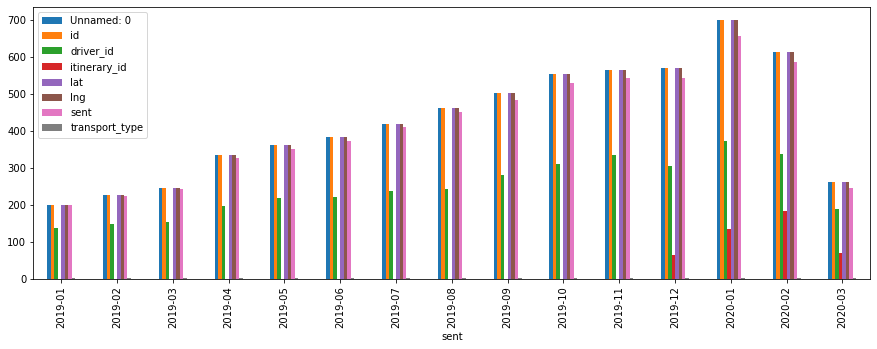

In [10]:
df.sent = pd.to_datetime(df.sent, format='%y-%m-%d %H:%M')
df.set_index(df.sent, inplace=True)
df.to_period('M').groupby(level=0).nunique().plot.bar(figsize=(15,5));

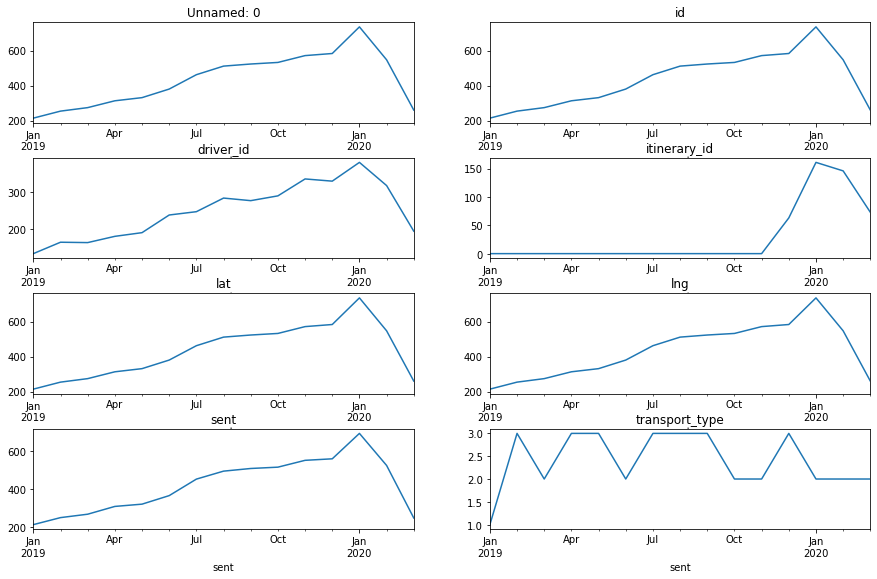

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(15,8))
plt.subplots_adjust(hspace=0.35, bottom=0)
axes = axes.flatten()
i = 0
for col in df.columns:
    df.to_period('M').groupby(level=0).nunique()[col].plot.line(ax=axes[i], title=col)
    i += 1

In [11]:
df.lat.describe()

count    6406.000000
mean      -23.472966
std         0.026615
min       -23.521342
25%       -23.494301
50%       -23.469946
75%       -23.453273
max       -23.414851
Name: lat, dtype: float64

**Important**:
- itinerary_id appears after 2019-12
- There is a positive (increment) trend in the number of data points from left to right (timeline)

- **Unnamed**: aparenta ser una especie de integer id unico para el archivo pero no para los dos archivos por lo que podria ser el resultado de algun export que se hizo para generar los CSVs. Posiblemente descartable.
- **id**: aparenta ser un string(32) unico no nulo que identifica la disponibilidad de un driver en un momento dato.
- **driver_id**: string(32) que identifica al conductor. No hay valores nulos. Puede repetirse.
- **itinerary_id**: string(32) que identifica el itinerario posiblemente asignado al conductor. Puede ser nulo y posiblemente signifique que no se ha asignado ningun conductor. Puede repetirse muy pocas veces y en todos los casos que se repitio el driver_id es el mismo. Varia id, ubicacion y horario en rangos pequenos.
- **lat**: latitude (plot pending to observe locations) no null found
- **lng**: longitude (plot pending to observe locations) no null found
- **sent**: datetime fmt('%y-%m-%d %H:%M') no null found
- **tranport_type**: int category (1, 3 or 4) no null found

# Availability Drivers Dataset 2
Es enorme por lo que voy a levantar el 0.1% de la misma (random selection)

In [15]:
# Availability 2
df = utils.read_csv_percent(files[1], percent=0.1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      14787 non-null  int64  
 1   id              14787 non-null  object 
 2   driver_id       14787 non-null  object 
 3   itinerary_id    1149 non-null   object 
 4   lat             14787 non-null  float64
 5   lng             14787 non-null  float64
 6   sent            14787 non-null  object 
 7   transport_type  14787 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 924.3+ KB
None


,Unnamed: 0,id,driver_id,itinerary_id,lat,lng,sent,transport_type
0,1134,f4c83513f65075c399836e48e62fb59d,7e6494905bcbb7d8a13ab72edd0a2f1f,NaN,-23.637408,-46.542929,19-10-22 14:00,1
1,3146,3d16548fca67268eb28a8722421defdf,2f8c7dbbb9f7bc11396e67ee1acfc5e7,NaN,-23.603358,-46.511330,19-10-22 15:25,1
2,4181,95a3761a234d689af67285c0b2c7472e,a78a21fa82aafa2f0bf78b1efa17d952,NaN,-23.630101,-46.581020,19-10-22 16:05,1
3,4222,ee32f1e430b0caccc23dddcc36f76304,a75df49aa45b695c92825941bc69247d,NaN,-23.574360,-46.546597,19-10-22 16:10,1
4,5044,39c56472a1e59b190ea3e1e33bc0bfa2,afee5a2f0053fdacc13e5347cecf466d,NaN,-23.629175,-46.583447,19-10-22 16:45,1


In [16]:
df.nunique()

Unnamed: 0        14787
id                14787
driver_id          3195
itinerary_id       1127
lat               14787
lng               14787
sent              13542
transport_type        3
dtype: int64

In [17]:
for col in ['id', 'driver_id', 'itinerary_id']:
    lid = 'len_{}'.format(col) 
    df[lid] = df[col].apply(lambda x: len(x) if pd.notna(x) else 0)
    print('Column', col)
    print('Rows with len(id) == 32:', len(df[df[lid] == 32]))
    print('Rows with len(id) == 0:', len(df[df[lid] == 0]))
    print('Rows with len(id) != 32 & != 0:', len(df[~df[lid].isin([0, 32])]))
    print()
    del df[lid]

Column id
Rows with len(id) == 32: 14787
Rows with len(id) == 0: 0
Rows with len(id) != 32 & != 0: 0

Column driver_id
Rows with len(id) == 32: 14787
Rows with len(id) == 0: 0
Rows with len(id) != 32 & != 0: 0

Column itinerary_id
Rows with len(id) == 32: 1149
Rows with len(id) == 0: 13638
Rows with len(id) != 32 & != 0: 0



In [18]:
dup_itineraries = df.groupby('itinerary_id').id.count().sort_values(ascending=False)
dup_itineraries = [k for k, v in dup_itineraries.items() if v > 1]
print('Duplicates itineraries_id: {}\n'.format(len(dup_itineraries)))
show = ['driver_id', 'lat', 'lng', 'sent', 'transport_type']
#show = ['transport_type']
for i, g in df[df.itinerary_id.isin(dup_itineraries)].groupby('itinerary_id'):
    print(i)
    print(g[show])

Duplicates itineraries_id: 20

07bf6988f4b26c40bc36674ef98d3e24
                             driver_id        lat        lng            sent  \
4155  3b97db75ff393470cdeb5e15d17529df -23.611105 -46.527269  20-02-01 08:10   
4156  3b97db75ff393470cdeb5e15d17529df -23.612359 -46.526942  20-02-01 08:25   

      transport_type  
4155               1  
4156               1  
11d93f17829496160fa1ffd41aedb72c
                             driver_id        lat        lng            sent  \
7121  a5e88b522720ab57f11f5ff833d7cdd6 -23.610925 -46.616276  20-03-09 08:10   
7123  a5e88b522720ab57f11f5ff833d7cdd6 -23.617955 -46.619051  20-03-09 08:45   

      transport_type  
7121               1  
7123               1  
298de54fa8b0a4f83dfbb0545e9092b8
                             driver_id        lat        lng            sent  \
4197  36ad102f1532147883fee7c6f5c0bb0f -23.644894 -46.568607  20-02-02 23:40   
4216  36ad102f1532147883fee7c6f5c0bb0f -23.644892 -46.568619  20-02-03 09:50   

      tra

In [19]:
sum(df.lat.isna()) + sum(df.lng.isna())

0

In [20]:
sum(df.sent.isna())

0

In [21]:
df.transport_type.unique()

array([1, 4, 3], dtype=int64)

In [22]:
sum(df.transport_type.isna())

0

We confirm in this dataset the same conclusions mentioned above

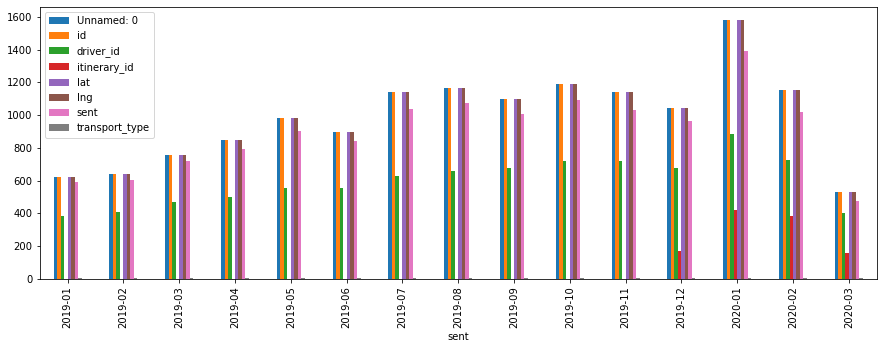

In [23]:
df.sent = pd.to_datetime(df.sent, format='%y-%m-%d %H:%M')
df.set_index(df.sent, inplace=True)
df.to_period('M').groupby(level=0).nunique().plot.bar(figsize=(15,5));

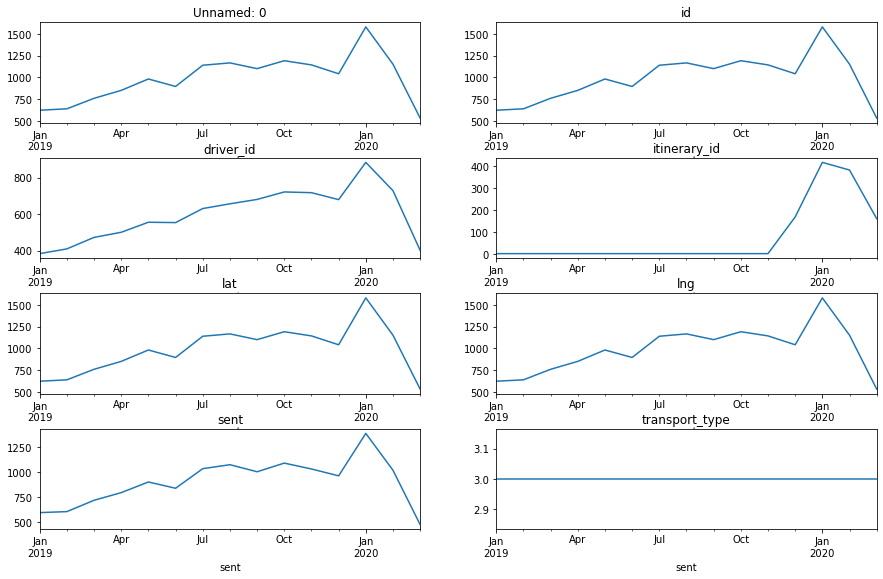

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(15,8))
plt.subplots_adjust(hspace=0.35, bottom=0)
axes = axes.flatten()
i = 0
for col in df.columns:
    df.to_period('M').groupby(level=0).nunique()[col].plot.line(ax=axes[i], title=col)
    i += 1

## TODO: check if availability 1 and 2 have duplicated ID

In [25]:
# Will upload one day with all rows of each dataset
def load_sent_on(filename, date='19-10-22'):
    # Sequential Access
    df = False
    chunksize = 10 ** 4
    for chunk in pd.read_csv(filename, chunksize=chunksize):
        condition = chunk['sent'].str.startswith(date)
        if sum(condition) > 0:
            if type(df) == bool:
                df = chunk[condition]
            else:
                df = pd.concat([df, chunk[condition]])

    return df

In [26]:
df1 = load_sent_on(files[0], '20-01-01')

In [27]:
df2 = load_sent_on(files[1], '20-01-01')

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8057 entries, 1362266 to 1370322
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8057 non-null   int64  
 1   id              8057 non-null   object 
 2   driver_id       8057 non-null   object 
 3   itinerary_id    2364 non-null   object 
 4   lat             8057 non-null   float64
 5   lng             8057 non-null   float64
 6   sent            8057 non-null   object 
 7   transport_type  8057 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 566.5+ KB


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10573 entries, 2679808 to 2690380
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10573 non-null  int64  
 1   id              10573 non-null  object 
 2   driver_id       10573 non-null  object 
 3   itinerary_id    4812 non-null   object 
 4   lat             10573 non-null  float64
 5   lng             10573 non-null  float64
 6   sent            10573 non-null  object 
 7   transport_type  10573 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 743.4+ KB


In [30]:
for col in ['id', 'driver_id', 'itinerary_id']:
    print('Unique values for "{}" in df1: {}'.format(col, df1[col].nunique()))
    print('Rows found in df2 with same value for {}: {}'.format(
            col, df2[df2.id.isin(df1['id'].unique())]['id'].count()))

Unique values for "id" in df1: 8057
Rows found in df2 with same value for id: 0
Unique values for "driver_id" in df1: 142
Rows found in df2 with same value for driver_id: 0
Unique values for "itinerary_id" in df1: 26
Rows found in df2 with same value for itinerary_id: 0
